In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
train_data = torchvision.datasets.CIFAR10(
    'data',
    train = True,
    transform = transforms.Compose([
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    download = True,
)

test_data = torchvision.datasets.CIFAR10(
    'data',
    train = False,
    transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data


In [4]:
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 128,
    shuffle = True,
    num_workers = 2,
    pin_memory = True,
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 128,
    shuffle = True,
    num_workers = 2,
    pin_memory = True,
)

In [9]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

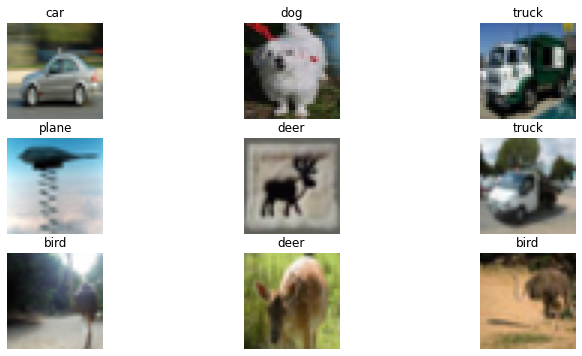

In [10]:
images, labels = next(iter(train_loader))
mean_tensor = torch.tensor([0.485, 0.456, 0.406])
std_tensor = torch.tensor([0.229, 0.224, 0.225])

plt.figure(figsize = (12, 6))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(torch.permute(images[i, ...], (1, 2, 0)) * std_tensor + mean_tensor)
  plt.title(classes[labels[i]])
  plt.axis('off')

In [75]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 128, (3, 3), padding = 'same')
    nn.init.kaiming_normal_(self.conv1.weight)
    self.batchnorm1 = nn.BatchNorm2d(128)
    self.activation1 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d((2, 2), 2)
    self.dropout1 = nn.Dropout(0.5)

    self.conv2 = nn.Conv2d(128, 256, (3, 3), padding = 'same')
    nn.init.kaiming_normal_(self.conv2.weight)
    self.batchnorm2 = nn.BatchNorm2d(256)
    self.activation2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d((2, 2), 2)
    self.dropout2 = nn.Dropout(0.5)

    self.conv3 = nn.Conv2d(256, 512, (3, 3), padding = 'same')
    nn.init.kaiming_normal_(self.conv3.weight)
    self.batchnorm3 = nn.BatchNorm2d(512)
    self.activation3 = nn.ReLU()
    self.conv4 = nn.Conv2d(512, 512, (3, 3), padding = 'same')
    nn.init.kaiming_normal_(self.conv4.weight)
    self.batchnorm4 = nn.BatchNorm2d(512)
    self.activation4 = nn.ReLU()
    self.conv5 = nn.Conv2d(512, 256, (3, 3), padding = 'same')
    nn.init.kaiming_normal_(self.conv5.weight)
    self.batchnorm5 = nn.BatchNorm2d(256)
    self.activation5 = nn.ReLU()
    self.maxpool3 = nn.MaxPool2d((2, 2), 2)
    self.dropout3 = nn.Dropout(0.5)

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(256 * 4 * 4, 1024)
    nn.init.kaiming_normal_(self.fc1.weight)
    self.batchnorm6 = nn.BatchNorm1d(1024)
    self.activation6 = nn.ReLU()
    self.dropout4 = nn.Dropout(0.5)

    self.fc2 = nn.Linear(1024, 512)
    nn.init.kaiming_normal_(self.fc2.weight)
    self.batchnorm7 = nn.BatchNorm1d(512)
    self.activation7 = nn.ReLU()
    self.dropout5 = nn.Dropout(0.5)

    self.fc3 = nn.Linear(512, 256)
    nn.init.kaiming_normal_(self.fc3.weight)
    self.batchnorm8 = nn.BatchNorm1d(256)
    self.activation8 = nn.ReLU()
    self.dropout6 = nn.Dropout(0.5)

    self.fc4 = nn.Linear(256, 10)
    nn.init.xavier_normal_(self.fc4.weight)
    self.softmax = nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batchnorm1(x)
    x = self.activation1(x)
    x = self.maxpool1(x)
    if self.training == True:
      x = self.dropout1(x)

    x = self.conv2(x)
    x = self.batchnorm2(x)
    x = self.activation2(x)
    x = self.maxpool2(x)
    if self.training == True:
      x = self.dropout2(x)

    x = self.conv3(x)
    x = self.batchnorm3(x)
    x = self.activation3(x)
    x = self.conv4(x)
    x = self.batchnorm4(x)
    x = self.activation4(x)
    x = self.conv5(x)
    x = self.batchnorm5(x)
    x = self.activation5(x)
    x = self.maxpool3(x)
    if self.training == True:
      x = self.dropout3(x)
    
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.batchnorm6(x)
    x = self.activation6(x)
    if self.training == True:
      x = self.dropout4(x)

    x = self.fc2(x)
    x = self.batchnorm7(x)
    x = self.activation7(x)
    if self.training == True:
      x = self.dropout5(x)

    x = self.fc3(x)
    x = self.batchnorm8(x)
    x = self.activation8(x)
    if self.training == True:
      x = self.dropout6(x)

    x = self.fc4(x)
    x = self.softmax(x)
    return x

In [76]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 5e-4, weight_decay = 1e-4)
epochs = 100

In [77]:
train_loss_list = []
train_accuracy_list = []
val_loss_list = []
val_accuracy_list = []

In [78]:
for epoch in range(epochs):
  # Training
  model.train()
  train_loss = 0
  correct, total = 0, 0

  for images, labels in train_loader:
    optimizer.zero_grad()
    output = model(images.to(device))
    loss = criterion(output, labels.to(device))
    loss.backward()
    nn.utils.clip_grad_value_(model.parameters(), 0.5)
    optimizer.step()

    train_loss += loss.item()
    total += len(labels.to(device))
    correct += (output.argmax(dim = 1) == labels.to(device)).to(torch.int32).sum().item()

  train_loss /= total
  accuracy = correct / total

  # Validation
  model.eval()
  val_loss = 0
  correct, total = 0, 0

  for images, labels in test_loader:
    with torch.no_grad():
      output = model(images.to(device))
      loss = criterion(output, labels.to(device))

      val_loss += loss.item()
      total += len(labels.to(device))
      correct += (output.argmax(dim = 1) == labels.to(device)).to(torch.int32).sum().item()

  val_loss /= total
  val_accuracy = correct / total

  train_loss_list.append(train_loss)
  train_accuracy_list.append(accuracy)
  val_loss_list.append(val_loss)
  val_accuracy_list.append(val_accuracy)
  print('Epoch %d: Loss %.4f - Accuracy %.4f - Val_loss %.4f - Val_accuracy %.4f' % (epoch + 1, train_loss, accuracy, val_loss, val_accuracy))

Epoch 1: Loss 0.0166 - Accuracy 0.3300 - Val_loss 0.0174 - Val_accuracy 0.2569
Epoch 2: Loss 0.0154 - Accuracy 0.4940 - Val_loss 0.0153 - Val_accuracy 0.5157
Epoch 3: Loss 0.0149 - Accuracy 0.5584 - Val_loss 0.0150 - Val_accuracy 0.5613
Epoch 4: Loss 0.0146 - Accuracy 0.5958 - Val_loss 0.0152 - Val_accuracy 0.5409
Epoch 5: Loss 0.0144 - Accuracy 0.6206 - Val_loss 0.0144 - Val_accuracy 0.6370
Epoch 6: Loss 0.0142 - Accuracy 0.6435 - Val_loss 0.0144 - Val_accuracy 0.6368
Epoch 7: Loss 0.0141 - Accuracy 0.6626 - Val_loss 0.0143 - Val_accuracy 0.6500
Epoch 8: Loss 0.0140 - Accuracy 0.6744 - Val_loss 0.0141 - Val_accuracy 0.6771
Epoch 9: Loss 0.0139 - Accuracy 0.6869 - Val_loss 0.0142 - Val_accuracy 0.6567
Epoch 10: Loss 0.0138 - Accuracy 0.6904 - Val_loss 0.0140 - Val_accuracy 0.6889
Epoch 11: Loss 0.0138 - Accuracy 0.6980 - Val_loss 0.0138 - Val_accuracy 0.7066
Epoch 12: Loss 0.0137 - Accuracy 0.7053 - Val_loss 0.0139 - Val_accuracy 0.6959
Epoch 13: Loss 0.0137 - Accuracy 0.7123 - Val_los